In [4]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [3]:
!pip install pydub

In [25]:
def split(filepath):
    sound = AudioSegment.from_wav(filepath)
    dBFS = sound.dBFS
    chunks = split_on_silence(sound, 
        min_silence_len = 50,
        silence_thresh = dBFS-16,
        #keep_silence = 250 //optional
    )
# target_length = 25 * 1000 //setting minimum length of each chunk to 25 seconds
    output_chunks = [chunks[0]]
    for chunk in chunks[1:]:
        if len(output_chunks[-1]) < target_length:
            output_chunks[-1] += chunk
        else:
            # if the last output chunk is longer than the target length,
            # we can start a new one
            output_chunks.append(chunk)
            return output_chunks

In [36]:
sound = AudioSegment.from_wav('/content/drive/MyDrive/Masters Project/sample1.wav')
print(split_on_silence(sound, min_silence_len=3))

[<pydub.audio_segment.AudioSegment object at 0x7f464151a290>, <pydub.audio_segment.AudioSegment object at 0x7f464151a090>, <pydub.audio_segment.AudioSegment object at 0x7f46416fddd0>, <pydub.audio_segment.AudioSegment object at 0x7f46416fd410>]


In [26]:
audio = split('/content/drive/MyDrive/Masters Project/sample1.wav')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: ignored

In [17]:
print(audio)

[<pydub.audio_segment.AudioSegment object at 0x7f465f95c850>, <pydub.audio_segment.AudioSegment object at 0x7f465f95cbd0>]


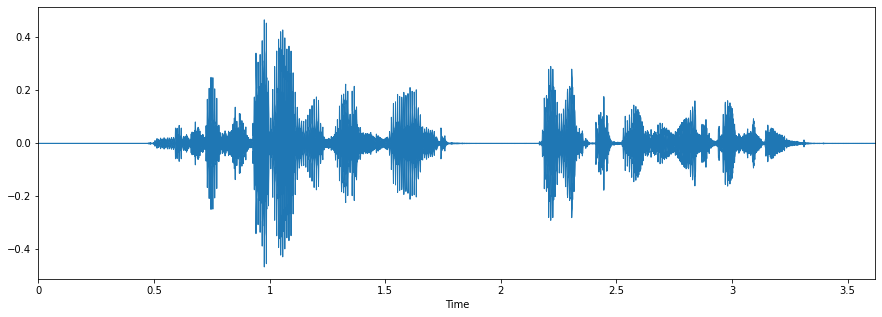

In [1]:
import numpy as np
import pandas as pd
import librosa as lb
import scipy as sp
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
filename = '/content/drive/MyDrive/Masters Project/sample1.wav'
plt.figure(figsize=(15,5))
data, sampleRate = librosa.load(filename)
librosa.display.waveplot(data, sampleRate)
ipd.Audio(filename, rate=sampleRate)

In [27]:
audioSections = librosa.effects.split(data, 40)

In [4]:
def displayTime(sf, ef):
    print("Start: " + str(sf/sampleRate) + ', end time' + str(ef/sampleRate))

In [28]:
print(audioSections)

[[10240 39936]
 [47104 73728]]


In [29]:
for i in audioSections:
    displayTime(i[0], i[1])

Start: 0.46439909297052157, end time1.811156462585034
Start: 2.136235827664399, end time3.3436734693877552


In [31]:
audioSections = audioSections.reshape(-1,1)

In [32]:
librosa.display.waveplot(audioSections, sampleRate)
ipd.Audio(audioSections, rate=sampleRate)

ParameterError: ignored

In [33]:
lb.output.write_wav("sample2.wav", audioSections, sampleRate)

AttributeError: ignored